In [ ]:
# ✅ STEP 1: Install required libraries
!pip install transformers accelerate bitsandbytes sentencepiece

# ✅ STEP 2: Login to Hugging Face (first-time only)
from huggingface_hub import login
login()  # Paste your token when prompted (must have access to Gemma)

# **African Gemma Outputs**

In [ ]:


# ✅ STEP 3: Load your prompt data (you can upload it from your machine)
import pandas as pd

from google.colab import files
uploaded = files.upload()  # Upload prompts.csv or cultural_region_prompts.csv

df = pd.read_csv("african_prompts.csv")  # Change if you uploaded a different file
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts.")

# ✅ STEP 4: Load Gemma model from Hugging Face
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import json

model_name = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

# ✅ STEP 5: Generate responses
sampling_args = {
    "temperature": 0.7,
    "top_p": 0.95,
    "max_new_tokens": 512,
    "do_sample": True
}

results = []

for i, prompt in enumerate(prompts):
    for j in range(3):  # generate 3 responses per prompt
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
        output_ids = model.generate(input_ids, **sampling_args)
        response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        results.append({
            "model": "gemma-2b-it",
            "temperature": 0.7,
            "topic": "General",
            "category": "general",
            "region": None,
            "prompt": prompt,
            "response": response
        })

    print(f"✅ {i+1}/{len(prompts)} prompts done with 3 responses each")

# ✅ STEP 6: Save results to JSON
with open("gemma_prompts_outputs.json", "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

# ✅ STEP 7: Download the JSON file
files.download("gemma_outputs.json")


# **African Gpt Outputs**

In [ ]:
# ✅ STEP 1: Install OpenAI if needed
!pip install openai

# ✅ STEP 2: Import Libraries and Load API Key
import openai, pandas as pd, json, time
from google.colab import files
from openai import OpenAI

# 🗝️ Paste your OpenAI API key here
client = OpenAI(api_key="<<<>>Your API key>")
# ✅ STEP 3: Upload CSV
uploaded = files.upload()  # Upload either cultural_region_prompts.csv or prompts_global.csv
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts from {filename}")

# ✅ STEP 4: Generate responses using GPT-3.5-Turbo
results = []
for i, prompt in enumerate(prompts):
    for j in range(3):  # Generate 3 responses per prompt
        try:
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                top_p=0.95,
                max_tokens=512
            )
            response_text = response.choices[0].message.content

            results.append({
                "model": "gpt-3.5-turbo",
                "temperature": 0.7,
                "prompt": prompt,
                "response": response_text
            })

            print(f"✅ [{i+1}/{len(prompts)}] x{j+1} {prompt[:40]}...")
            time.sleep(1.2)
        except Exception as e:
            print(f"❌ Error with prompt {i+1} x{j+1}: {e}")
            time.sleep(5)

# ✅ STEP 5: Save and Download JSON
json_name = filename.replace(".csv", ".json").replace("prompts", "gpt_outputs")
with open(json_name, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

files.download(json_name)


Saving african_prompts.csv to african_prompts.csv
Loaded 30 prompts from african_prompts.csv
✅ [1/30] x1 What are the values emphasized in Ubuntu...
✅ [1/30] x2 What are the values emphasized in Ubuntu...
✅ [1/30] x3 What are the values emphasized in Ubuntu...
✅ [2/30] x1 How should a leader act in a traditional...
✅ [2/30] x2 How should a leader act in a traditional...
✅ [2/30] x3 How should a leader act in a traditional...
✅ [3/30] x1 What is the role of elders in African fa...
✅ [3/30] x2 What is the role of elders in African fa...
✅ [3/30] x3 What is the role of elders in African fa...
✅ [4/30] x1 How important is community over individu...
✅ [4/30] x2 How important is community over individu...
✅ [4/30] x3 How important is community over individu...
✅ [5/30] x1 How do African nations view the role of ...
✅ [5/30] x2 How do African nations view the role of ...
✅ [5/30] x3 How do African nations view the role of ...
✅ [6/30] x1 What is the cultural significance of tra...
✅ [6/30] x2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **African Llema outputs**

In [ ]:
import pandas as pd
import json
import time
from transformers import AutoModelForCausalLM, AutoTokenizer
from huggingface_hub import HfFolder
import torch

In [ ]:
# ✅ STEP 4: Load prompt data

filename = list(uploaded.keys())[0]  # Take the uploaded file
df = pd.read_csv(filename)
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts from {filename}")

# ✅ STEP 5: Load LLaMA 2 model

model_name = "meta-llama/Llama-2-7b-chat-hf"
access_token = HfFolder.get_token()
tokenizer = AutoTokenizer.from_pretrained(model_name, token=access_token)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto",
    token=access_token
)

# ✅ STEP 6: Generate 3 responses per prompt

sampling_args = {
    "temperature": 0.7,
    "top_p": 0.95,
    "max_new_tokens": 512,
    "do_sample": True
}

results = []

for i, prompt in enumerate(prompts):
    for j in range(3):
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
        output_ids = model.generate(input_ids, **sampling_args)
        response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        results.append({
            "model": "llama-2-7b-chat",
            "temperature": 0.7,
            "prompt": prompt,
            "response": response
        })
    print(f"✅ [{i+1}/{len(prompts)}] done")

# ✅ STEP 7: Save and download JSON

json_name = filename.replace(".csv", ".json").replace("prompts", "llama_outputs")
with open(json_name, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

from google.colab import files
files.download(json_name)


Loaded 30 prompts from african_prompts.csv


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

✅ [1/30] done
✅ [2/30] done
✅ [3/30] done
✅ [4/30] done
✅ [5/30] done
✅ [6/30] done
✅ [7/30] done
✅ [8/30] done
✅ [9/30] done
✅ [10/30] done
✅ [11/30] done
✅ [12/30] done
✅ [13/30] done
✅ [14/30] done
✅ [15/30] done
✅ [16/30] done
✅ [17/30] done
✅ [18/30] done
✅ [19/30] done
✅ [20/30] done
✅ [21/30] done
✅ [22/30] done
✅ [23/30] done
✅ [24/30] done
✅ [25/30] done
✅ [26/30] done
✅ [27/30] done
✅ [28/30] done
✅ [29/30] done
✅ [30/30] done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Analyse the African prompts with three models**

# **Prompts Previous**

In [ ]:


# ✅ STEP 3: Load your prompt data (you can upload it from your machine)
import pandas as pd

from google.colab import files
uploaded = files.upload()  # Upload prompts.csv or cultural_region_prompts.csv

df = pd.read_csv("prompts.csv")  # Change if you uploaded a different file
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts.")

# ✅ STEP 4: Load Gemma model from Hugging Face
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import json

model_name = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

# ✅ STEP 5: Generate responses
sampling_args = {
    "temperature": 0.7,
    "top_p": 0.95,
    "max_new_tokens": 512,
    "do_sample": True
}

results = []

for i, prompt in enumerate(prompts):
    for j in range(3):  # generate 3 responses per prompt
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
        output_ids = model.generate(input_ids, **sampling_args)
        response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        results.append({
            "model": "gemma-2b-it",
            "temperature": 0.7,
            "topic": "General",
            "category": "general",
            "region": None,
            "prompt": prompt,
            "response": response
        })

    print(f"✅ {i+1}/{len(prompts)} prompts done with 3 responses each")

# ✅ STEP 6: Save results to JSON
with open("gemma_prompts_outputs.json", "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

# ✅ STEP 7: Download the JSON file
files.download("gemma_outputs.json")


In [ ]:
!nvidia-smi

Sat May 17 10:14:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             28W /   70W |    5970MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
print(torch.cuda.is_available())      # Should print True
print(torch.cuda.get_device_name(0))  # Should print Tesla T4


True
Tesla T4


In [ ]:


# ✅ STEP 3: Load your prompt data (you can upload it from your machine)
import pandas as pd

from google.colab import files
uploaded = files.upload()  # Upload prompts.csv or cultural_region_prompts.csv

df = pd.read_csv("cultural_region_prompts.csv")  # Change if you uploaded a different file
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts.")

# ✅ STEP 4: Load Gemma model from Hugging Face
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import json

model_name = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

# ✅ STEP 5: Generate responses
sampling_args = {
    "temperature": 0.7,
    "top_p": 0.95,
    "max_new_tokens": 512,
    "do_sample": True
}

results = []

for i, prompt in enumerate(prompts):
    for j in range(3):  # generate 3 responses per prompt
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
        output_ids = model.generate(input_ids, **sampling_args)
        response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        results.append({
            "model": "gemma-2b-it",
            "temperature": 0.7,
            "topic": "General",
            "category": "general",
            "region": None,
            "prompt": prompt,
            "response": response
        })

    print(f"✅ {i+1}/{len(prompts)} prompts done with 3 responses each")

# ✅ STEP 6: Save results to JSON
with open("cultural_region_prompts.json", "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

# ✅ STEP 7: Download the JSON file
files.download("cultural_region_prompts.json")


Saving cultural_region_prompts.csv to cultural_region_prompts.csv
Loaded 42 prompts.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

✅ 1/42 prompts done with 3 responses each
✅ 2/42 prompts done with 3 responses each
✅ 3/42 prompts done with 3 responses each
✅ 4/42 prompts done with 3 responses each
✅ 5/42 prompts done with 3 responses each
✅ 6/42 prompts done with 3 responses each
✅ 7/42 prompts done with 3 responses each
✅ 8/42 prompts done with 3 responses each
✅ 9/42 prompts done with 3 responses each
✅ 10/42 prompts done with 3 responses each
✅ 11/42 prompts done with 3 responses each
✅ 12/42 prompts done with 3 responses each
✅ 13/42 prompts done with 3 responses each
✅ 14/42 prompts done with 3 responses each
✅ 15/42 prompts done with 3 responses each
✅ 16/42 prompts done with 3 responses each
✅ 17/42 prompts done with 3 responses each
✅ 18/42 prompts done with 3 responses each
✅ 19/42 prompts done with 3 responses each
✅ 20/42 prompts done with 3 responses each
✅ 21/42 prompts done with 3 responses each
✅ 22/42 prompts done with 3 responses each
✅ 23/42 prompts done with 3 responses each
✅ 24/42 prompts done

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


# ✅ STEP 3: Load your prompt data (you can upload it from your machine)
import pandas as pd

from google.colab import files
uploaded = files.upload()  # Upload prompts.csv or cultural_region_prompts.csv

df = pd.read_csv("prompts_global.csv")  # Change if you uploaded a different file
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts.")

# ✅ STEP 4: Load Gemma model from Hugging Face
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import json

model_name = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

# ✅ STEP 5: Generate responses
sampling_args = {
    "temperature": 0.7,
    "top_p": 0.95,
    "max_new_tokens": 512,
    "do_sample": True
}

results = []

for i, prompt in enumerate(prompts):
    for j in range(3):  # generate 3 responses per prompt
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
        output_ids = model.generate(input_ids, **sampling_args)
        response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        results.append({
            "model": "gemma-2b-it",
            "temperature": 0.7,
            "topic": "General",
            "category": "general",
            "region": None,
            "prompt": prompt,
            "response": response
        })

    print(f"✅ {i+1}/{len(prompts)} prompts done with 3 responses each")

# ✅ STEP 6: Save results to JSON
with open("prompts_global.json", "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

# ✅ STEP 7: Download the JSON file
files.download("prompts_global.json")


Saving prompts_global.csv to prompts_global.csv
Loaded 36 prompts.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

✅ 1/36 prompts done with 3 responses each
✅ 2/36 prompts done with 3 responses each
✅ 3/36 prompts done with 3 responses each
✅ 4/36 prompts done with 3 responses each
✅ 5/36 prompts done with 3 responses each
✅ 6/36 prompts done with 3 responses each
✅ 7/36 prompts done with 3 responses each
✅ 8/36 prompts done with 3 responses each
✅ 9/36 prompts done with 3 responses each
✅ 10/36 prompts done with 3 responses each
✅ 11/36 prompts done with 3 responses each
✅ 12/36 prompts done with 3 responses each
✅ 13/36 prompts done with 3 responses each
✅ 14/36 prompts done with 3 responses each
✅ 15/36 prompts done with 3 responses each
✅ 16/36 prompts done with 3 responses each
✅ 17/36 prompts done with 3 responses each
✅ 18/36 prompts done with 3 responses each
✅ 19/36 prompts done with 3 responses each
✅ 20/36 prompts done with 3 responses each
✅ 21/36 prompts done with 3 responses each
✅ 22/36 prompts done with 3 responses each
✅ 23/36 prompts done with 3 responses each
✅ 24/36 prompts done

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **CHAT GPT**

In [ ]:
# ✅ STEP 1: Install OpenAI if needed
!pip install openai

# ✅ STEP 2: Import Libraries and Load API Key
import openai, pandas as pd, json, time
from google.colab import files
from openai import OpenAI

# 🗝️ Paste your OpenAI API key here
client = OpenAI(api_key="")
# ✅ STEP 3: Upload CSV
uploaded = files.upload()  # Upload either cultural_region_prompts.csv or prompts_global.csv
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts from {filename}")

# ✅ STEP 4: Generate responses using GPT-3.5-Turbo
results = []
for i, prompt in enumerate(prompts):
    for j in range(3):  # Generate 3 responses per prompt
        try:
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                top_p=0.95,
                max_tokens=512
            )
            response_text = response.choices[0].message.content

            results.append({
                "model": "gpt-3.5-turbo",
                "temperature": 0.7,
                "prompt": prompt,
                "response": response_text
            })

            print(f"✅ [{i+1}/{len(prompts)}] x{j+1} {prompt[:40]}...")
            time.sleep(1.2)
        except Exception as e:
            print(f"❌ Error with prompt {i+1} x{j+1}: {e}")
            time.sleep(5)

# ✅ STEP 5: Save and Download JSON
json_name = filename.replace(".csv", ".json").replace("prompts", "gpt_outputs")
with open(json_name, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

files.download(json_name)


In [ ]:
# ✅ STEP 1: Install OpenAI if needed
!pip install openai

# ✅ STEP 2: Import Libraries and Load API Key
import openai, pandas as pd, json, time
from google.colab import files
from openai import OpenAI

# 🗝️ Paste your OpenAI API key here
client = OpenAI(api_key="")
# ✅ STEP 3: Upload CSV
uploaded = files.upload()  # Upload either cultural_region_prompts.csv or prompts_global.csv
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts from {filename}")

# ✅ STEP 4: Generate responses using GPT-3.5-Turbo
results = []
for i, prompt in enumerate(prompts):
    for j in range(3):  # Generate 3 responses per prompt
        try:
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7,
                top_p=0.95,
                max_tokens=512
            )
            response_text = response.choices[0].message.content

            results.append({
                "model": "gpt-3.5-turbo",
                "temperature": 0.7,
                "prompt": prompt,
                "response": response_text
            })

            print(f"✅ [{i+1}/{len(prompts)}] x{j+1} {prompt[:40]}...")
            time.sleep(1.2)
        except Exception as e:
            print(f"❌ Error with prompt {i+1} x{j+1}: {e}")
            time.sleep(5)

# ✅ STEP 5: Save and Download JSON
json_name = filename.replace(".csv", ".json").replace("prompts", "gpt_outputs")
with open(json_name, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

files.download(json_name)


**Llama Code** *Prompts*

In [ ]:
# ✅ STEP 1: Install required libraries
!pip install transformers accelerate bitsandbytes

# ✅ STEP 2: Authenticate with Hugging Face (only once per session)
from huggingface_hub import login
login()  # Paste your token when prompted (must have access to LLaMA-2)

# ✅ STEP 3: Upload one of your prompt files
from google.colab import files
uploaded = files.upload()  # Upload prompts.csv, cultural_region_prompts.csv, or prompts_global.csv

import pandas as pd
import json
import time
from transformers import AutoModelForCausalLM, AutoTokenizer
from huggingface_hub import HfFolder
import torch

In [ ]:
# ✅ STEP 2: Authenticate with Hugging Face (only once per session)
from huggingface_hub import login
login()  # Paste your token when prompted (must have access to LLaMA-2)

In [ ]:
# ✅ STEP 4: Load prompt data

filename = list(uploaded.keys())[0]  # Take the uploaded file
df = pd.read_csv(filename)
prompts = df["prompt"].dropna().tolist()
print(f"Loaded {len(prompts)} prompts from {filename}")

# ✅ STEP 5: Load LLaMA 2 model

model_name = "meta-llama/Llama-2-7b-chat-hf"
access_token = HfFolder.get_token()
tokenizer = AutoTokenizer.from_pretrained(model_name, token=access_token)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto",
    token=access_token
)

# ✅ STEP 6: Generate 3 responses per prompt

sampling_args = {
    "temperature": 0.7,
    "top_p": 0.95,
    "max_new_tokens": 512,
    "do_sample": True
}

results = []

for i, prompt in enumerate(prompts):
    for j in range(3):
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
        output_ids = model.generate(input_ids, **sampling_args)
        response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        results.append({
            "model": "llama-2-7b-chat",
            "temperature": 0.7,
            "prompt": prompt,
            "response": response
        })
    print(f"✅ [{i+1}/{len(prompts)}] done")

# ✅ STEP 7: Save and download JSON

json_name = filename.replace(".csv", ".json").replace("prompts", "llama_outputs")
with open(json_name, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

from google.colab import files
files.download(json_name)


**Analyse for Llama**

In [ ]:
# ✅ STEP 1: Install required libraries
!pip install bert-score sentence-transformers

# ✅ STEP 2: Upload your .json file
from google.colab import files
uploaded = files.upload()  # Upload one JSON file like llama_outputs_prompts.json

import json, math
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from sentence_transformers import SentenceTransformer, util
from bert_score import score

filename = list(uploaded.keys())[0]  # Get uploaded JSON filename
print(f"Loaded file: {filename}")

# === Load responses ===
with open(filename, "r", encoding="utf-8") as f:
    flat_data = json.load(f)

# === Group responses by prompt ===
grouped = defaultdict(list)
for item in flat_data:
    grouped[item["prompt"]].append(item["response"])

# === Metric Functions ===
embedder = SentenceTransformer("all-MiniLM-L6-v2")

def compute_entropy(responses):
    tokens = [token for resp in responses for token in resp.split()]
    probs = [count / len(tokens) for count in Counter(tokens).values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def compute_consistency(responses):
    if len(responses) < 2:
        return 1.0
    embeddings = embedder.encode(responses, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
    upper = cosine_scores.cpu().numpy()[np.triu_indices(len(responses), k=1)]
    return upper.mean()

def compute_bertscore(responses, reference):
    refs = [reference] * len(responses)
    P, R, F1 = score(responses, refs, model_type="distilbert-base-uncased", lang="en", rescale_with_baseline=True)
    return F1.mean().item()

# === Compute metrics ===
records = []
for prompt, responses in grouped.items():
    reference = responses[0]  # Fallback if no gold reference
    entropy = compute_entropy(responses)
    consistency = compute_consistency(responses)
    bert = compute_bertscore(responses, reference)

    records.append({
        "prompt": prompt,
        "n_responses": len(responses),
        "entropy": round(entropy, 3),
        "consistency": round(consistency, 3),
        "bertscore": round(bert, 3)
    })

# === Save to CSV ===
df = pd.DataFrame(records)
output_filename = filename.replace(".json", ".csv")
df.to_csv(output_filename, index=False)
print(f"✅ Saved analysis to {output_filename}")

# ✅ Download the result
files.download(output_filename)


In [ ]:
# ✅ STEP 2: Upload your .json file
from google.colab import files
uploaded = files.upload()  # Upload one JSON file like llama_outputs_prompts.json

import json, math
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from sentence_transformers import SentenceTransformer, util
from bert_score import score

filename = list(uploaded.keys())[0]  # Get uploaded JSON filename
print(f"Loaded file: {filename}")

# === Load responses ===
with open(filename, "r", encoding="utf-8") as f:
    flat_data = json.load(f)

# === Group responses by prompt ===
grouped = defaultdict(list)
for item in flat_data:
    grouped[item["prompt"]].append(item["response"])

# === Metric Functions ===
embedder = SentenceTransformer("all-MiniLM-L6-v2")

def compute_entropy(responses):
    tokens = [token for resp in responses for token in resp.split()]
    probs = [count / len(tokens) for count in Counter(tokens).values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def compute_consistency(responses):
    if len(responses) < 2:
        return 1.0
    embeddings = embedder.encode(responses, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
    upper = cosine_scores.cpu().numpy()[np.triu_indices(len(responses), k=1)]
    return upper.mean()

def compute_bertscore(responses, reference):
    refs = [reference] * len(responses)
    P, R, F1 = score(responses, refs, model_type="distilbert-base-uncased", lang="en", rescale_with_baseline=True)
    return F1.mean().item()

# === Compute metrics ===
records = []
for prompt, responses in grouped.items():
    reference = responses[0]  # Fallback if no gold reference
    entropy = compute_entropy(responses)
    consistency = compute_consistency(responses)
    bert = compute_bertscore(responses, reference)

    records.append({
        "prompt": prompt,
        "n_responses": len(responses),
        "entropy": round(entropy, 3),
        "consistency": round(consistency, 3),
        "bertscore": round(bert, 3)
    })

# === Save to CSV ===
df = pd.DataFrame(records)
output_filename = filename.replace(".json", ".csv")
df.to_csv(output_filename, index=False)
print(f"✅ Saved analysis to {output_filename}")

# ✅ Download the result
files.download(output_filename)

Saving african_gemma_prompts_outputs.json to african_gemma_prompts_outputs.json
Loaded file: african_gemma_prompts_outputs.json
✅ Saved analysis to african_gemma_prompts_outputs.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **African Grouped bar plot**

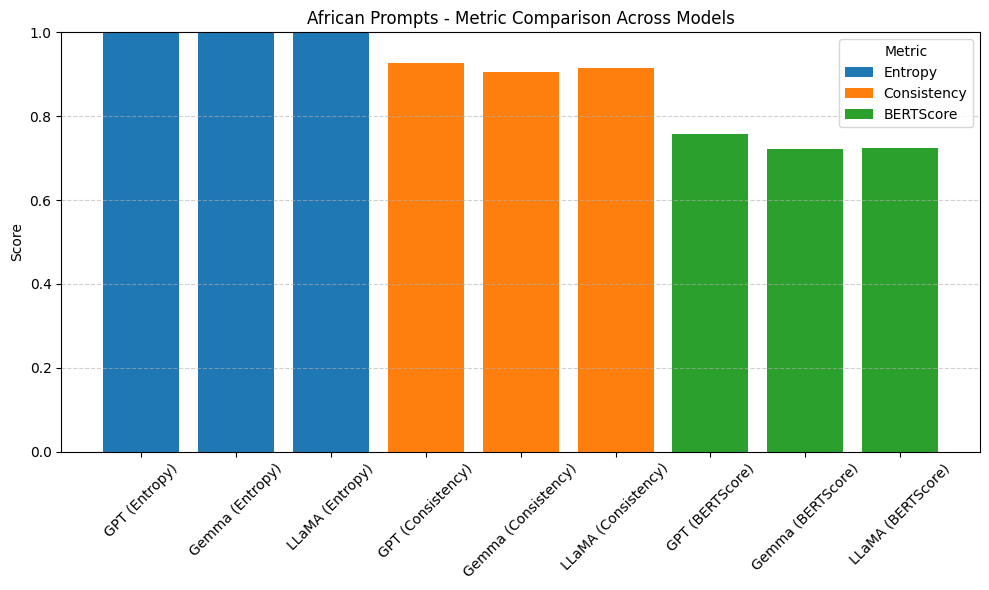

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data — replace with your real numbers
data = {
    "Model": ["GPT", "Gemma", "LLaMA"],
    "Entropy": [6.9, 7.47, 7.25],
    "Consistency": [0.9271, 0.9043, 0.9158],
    "BERTScore": [0.7568, 0.7226, 0.7249]
}

df = pd.DataFrame(data)

# Melt for seaborn-style plotting
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(10, 6))
for metric in df.columns[1:]:
    plt.bar(df["Model"] + f" ({metric})", df[metric], label=metric)

plt.title("African Prompts - Metric Comparison Across Models")
plt.ylabel("Score")
plt.ylim(0, 1.0 if "BERTScore" in df.columns else None)
plt.axhline(1.0, linestyle="--", color="gray", linewidth=0.5)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.legend(title="Metric")
plt.show()


In [ ]:
# ✅ STEP 2: Upload your .json file
from google.colab import files
uploaded = files.upload()  # Upload one JSON file like llama_outputs_prompts.json

import json, math
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from sentence_transformers import SentenceTransformer, util
from bert_score import score

filename = list(uploaded.keys())[0]  # Get uploaded JSON filename
print(f"Loaded file: {filename}")

# === Load responses ===
with open(filename, "r", encoding="utf-8") as f:
    flat_data = json.load(f)

# === Group responses by prompt ===
grouped = defaultdict(list)
for item in flat_data:
    grouped[item["prompt"]].append(item["response"])

# === Metric Functions ===
embedder = SentenceTransformer("all-MiniLM-L6-v2")

def compute_entropy(responses):
    tokens = [token for resp in responses for token in resp.split()]
    probs = [count / len(tokens) for count in Counter(tokens).values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def compute_consistency(responses):
    if len(responses) < 2:
        return 1.0
    embeddings = embedder.encode(responses, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
    upper = cosine_scores.cpu().numpy()[np.triu_indices(len(responses), k=1)]
    return upper.mean()

def compute_bertscore(responses, reference):
    refs = [reference] * len(responses)
    P, R, F1 = score(responses, refs, model_type="distilbert-base-uncased", lang="en", rescale_with_baseline=True)
    return F1.mean().item()

# === Compute metrics ===
records = []
for prompt, responses in grouped.items():
    reference = responses[0]  # Fallback if no gold reference
    entropy = compute_entropy(responses)
    consistency = compute_consistency(responses)
    bert = compute_bertscore(responses, reference)

    records.append({
        "prompt": prompt,
        "n_responses": len(responses),
        "entropy": round(entropy, 3),
        "consistency": round(consistency, 3),
        "bertscore": round(bert, 3)
    })

# === Save to CSV ===
df = pd.DataFrame(records)
output_filename = filename.replace(".json", ".csv")
df.to_csv(output_filename, index=False)
print(f"✅ Saved analysis to {output_filename}")

# ✅ Download the result
files.download(output_filename)

Saving llama_outputs_cultural_region.json to llama_outputs_cultural_region.json
Loaded file: llama_outputs_cultural_region.json
✅ Saved analysis to llama_outputs_cultural_region.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ✅ STEP 2: Upload your .json file
from google.colab import files
uploaded = files.upload()  # Upload one JSON file like llama_outputs_prompts.json

import json, math
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from sentence_transformers import SentenceTransformer, util
from bert_score import score

filename = list(uploaded.keys())[0]  # Get uploaded JSON filename
print(f"Loaded file: {filename}")

# === Load responses ===
with open(filename, "r", encoding="utf-8") as f:
    flat_data = json.load(f)

# === Group responses by prompt ===
grouped = defaultdict(list)
for item in flat_data:
    grouped[item["prompt"]].append(item["response"])

# === Metric Functions ===
embedder = SentenceTransformer("all-MiniLM-L6-v2")

def compute_entropy(responses):
    tokens = [token for resp in responses for token in resp.split()]
    probs = [count / len(tokens) for count in Counter(tokens).values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def compute_consistency(responses):
    if len(responses) < 2:
        return 1.0
    embeddings = embedder.encode(responses, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
    upper = cosine_scores.cpu().numpy()[np.triu_indices(len(responses), k=1)]
    return upper.mean()

def compute_bertscore(responses, reference):
    refs = [reference] * len(responses)
    P, R, F1 = score(responses, refs, model_type="distilbert-base-uncased", lang="en", rescale_with_baseline=True)
    return F1.mean().item()

# === Compute metrics ===
records = []
for prompt, responses in grouped.items():
    reference = responses[0]  # Fallback if no gold reference
    entropy = compute_entropy(responses)
    consistency = compute_consistency(responses)
    bert = compute_bertscore(responses, reference)

    records.append({
        "prompt": prompt,
        "n_responses": len(responses),
        "entropy": round(entropy, 3),
        "consistency": round(consistency, 3),
        "bertscore": round(bert, 3)
    })

# === Save to CSV ===
df = pd.DataFrame(records)
output_filename = filename.replace(".json", ".csv")
df.to_csv(output_filename, index=False)
print(f"✅ Saved analysis to {output_filename}")

# ✅ Download the result
files.download(output_filename)

Saving llama_outputs_global.json to llama_outputs_global.json
Loaded file: llama_outputs_global.json
✅ Saved analysis to llama_outputs_global.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving metrics_summary_gpt_cultural_region.csv to metrics_summary_gpt_cultural_region.csv
Saving metrics_summary_gpt_global.csv to metrics_summary_gpt_global.csv
Saving metrics_summary_llama_global.csv to metrics_summary_llama_global.csv
Saving metrics_summary_llama_cultural_region.csv to metrics_summary_llama_cultural_region.csv
Saving metrics_summary_llama_prompts.csv to metrics_summary_llama_prompts.csv
Saving metrics_summary_gemma_global.csv to metrics_summary_gemma_global.csv
Saving metrics_summary_gemma_cultural_region.csv to metrics_summary_gemma_cultural_region.csv
Saving metrics_summary_gemma_prompts.csv to metrics_summary_gemma_prompts.csv
Saving metrics_summary_gpt.csv to metrics_summary_gpt.csv


<ipython-input-7-cb1f8654bdcb>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="source", y="entropy", palette="Set3")


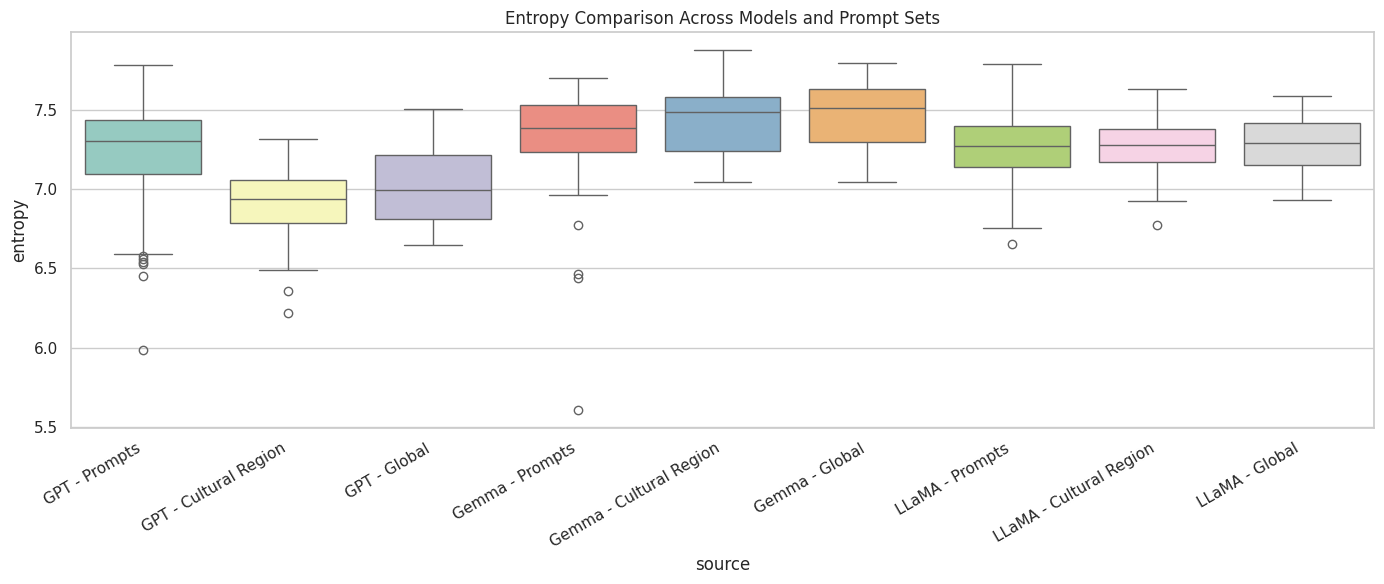

<ipython-input-7-cb1f8654bdcb>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="source", y="consistency", palette="Set2")


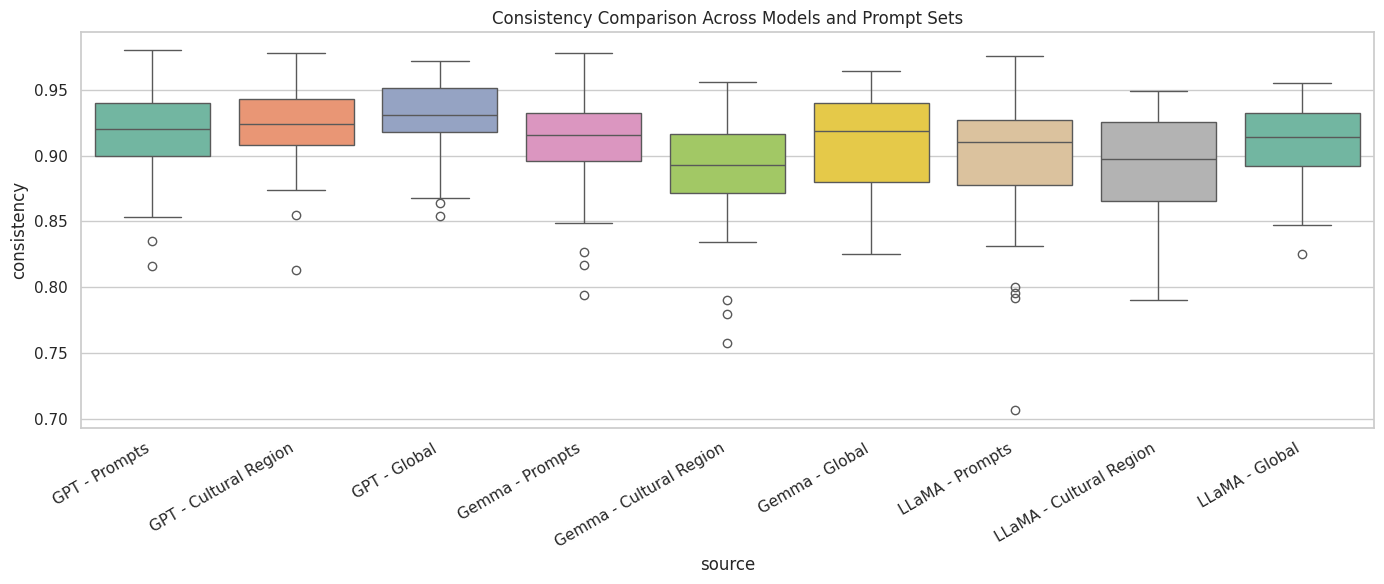

<ipython-input-7-cb1f8654bdcb>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="source", y="bertscore", palette="Set1")


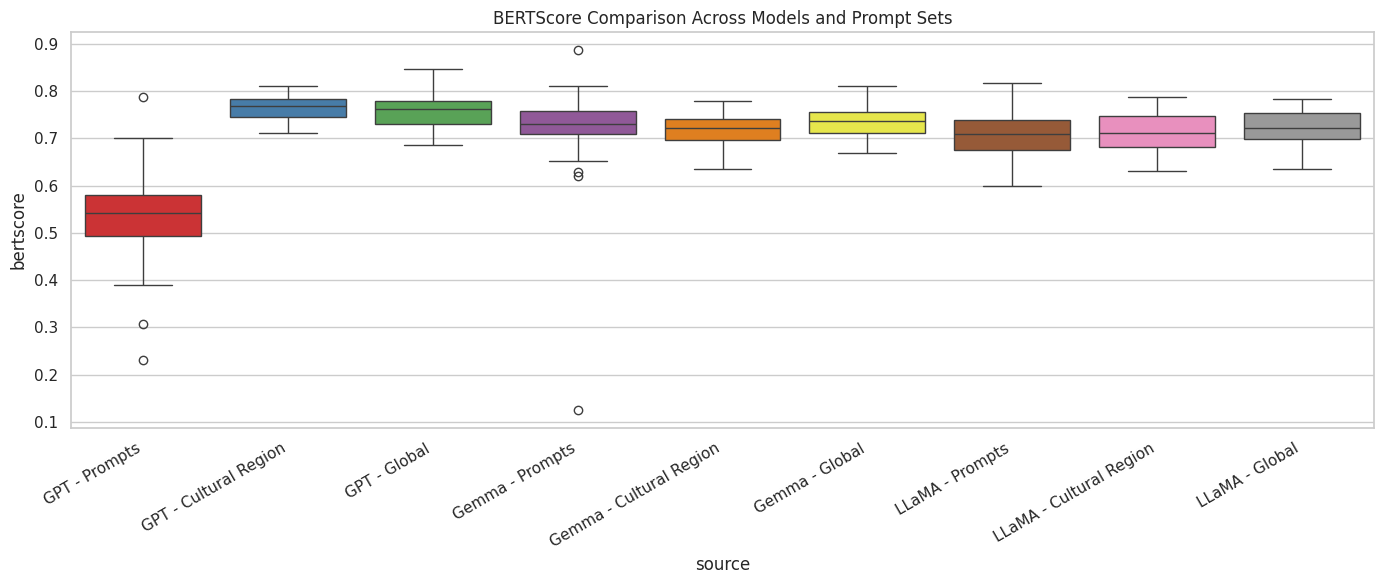

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 🔁 Define mapping of filenames to model + set labels
file_labels = {
    "metrics_summary_gpt.csv": "GPT - Prompts",
    "metrics_summary_gpt_cultural_region.csv": "GPT - Cultural Region",
    "metrics_summary_gpt_global.csv": "GPT - Global",
    "metrics_summary_gemma_prompts.csv": "Gemma - Prompts",
    "metrics_summary_gemma_cultural_region.csv": "Gemma - Cultural Region",
    "metrics_summary_gemma_global.csv": "Gemma - Global",
    "metrics_summary_llama_prompts.csv": "LLaMA - Prompts",
    "metrics_summary_llama_cultural_region.csv": "LLaMA - Cultural Region",
    "metrics_summary_llama_global.csv": "LLaMA - Global"
}

# 🧩 Load and label all data
dfs = []
for file, label in file_labels.items():
    if os.path.exists(file):
        df = pd.read_csv(file)
        df["source"] = label
        dfs.append(df)
    else:
        print(f"⚠️ Missing: {file}")

# ✅ Combine all into one DataFrame
df_combined = pd.concat(dfs, ignore_index=True)

# 🎨 Set style
sns.set(style="whitegrid")

# ✅ Plot: Entropy
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined, x="source", y="entropy", palette="Set3")
plt.title("Entropy Comparison Across Models and Prompt Sets")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# ✅ Plot: Consistency
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined, x="source", y="consistency", palette="Set2")
plt.title("Consistency Comparison Across Models and Prompt Sets")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# ✅ Plot: BERTScore
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_combined, x="source", y="bertscore", palette="Set1")
plt.title("BERTScore Comparison Across Models and Prompt Sets")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


<ipython-input-8-e83eda687e0a>:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


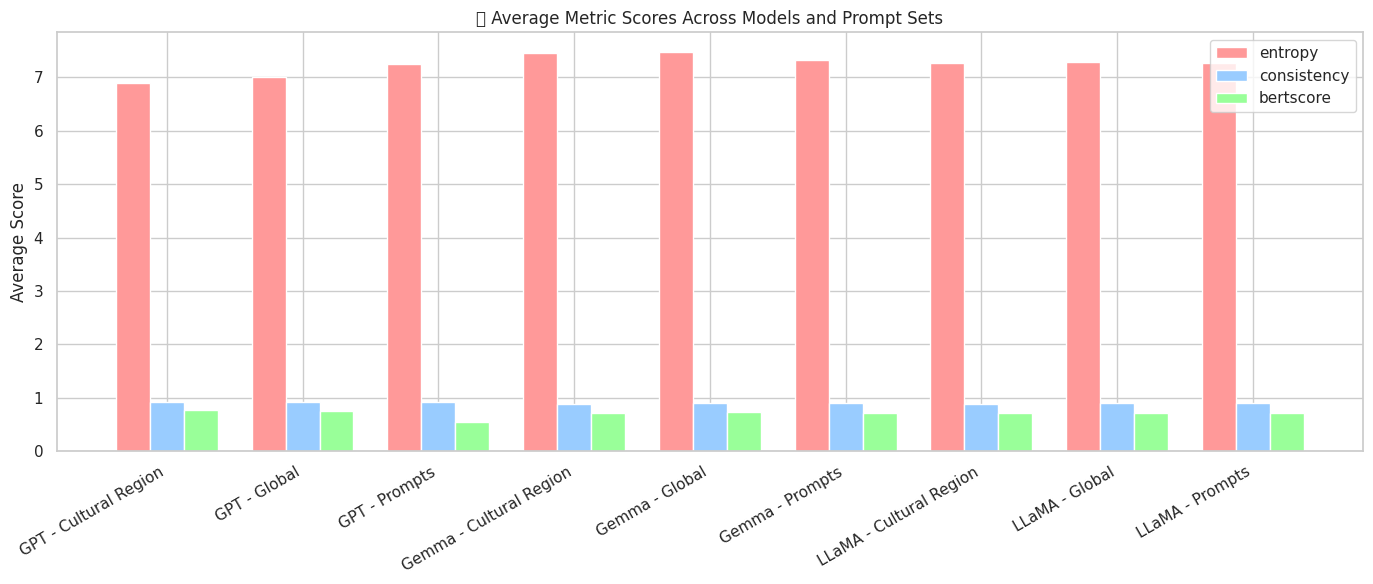

<ipython-input-8-e83eda687e0a>:57: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


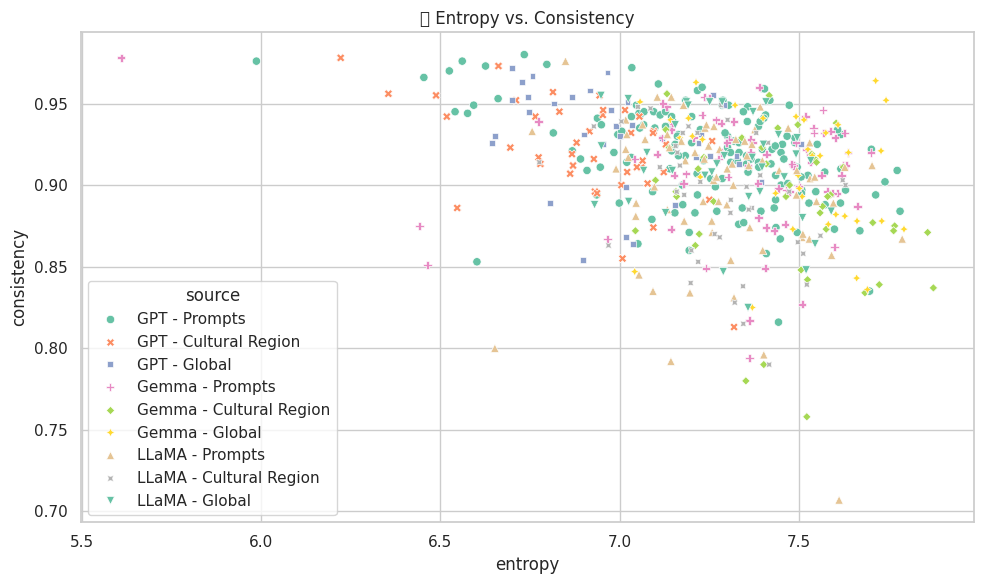

<ipython-input-8-e83eda687e0a>:64: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


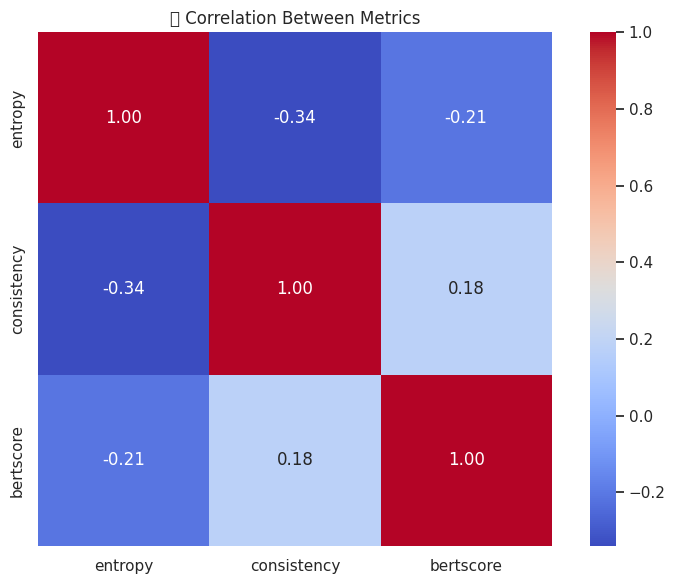

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Step 1: Map file names to model/prompt set labels
file_labels = {
    "metrics_summary_gpt.csv": "GPT - Prompts",
    "metrics_summary_gpt_cultural_region.csv": "GPT - Cultural Region",
    "metrics_summary_gpt_global.csv": "GPT - Global",
    "metrics_summary_gemma_prompts.csv": "Gemma - Prompts",
    "metrics_summary_gemma_cultural_region.csv": "Gemma - Cultural Region",
    "metrics_summary_gemma_global.csv": "Gemma - Global",
    "metrics_summary_llama_prompts.csv": "LLaMA - Prompts",
    "metrics_summary_llama_cultural_region.csv": "LLaMA - Cultural Region",
    "metrics_summary_llama_global.csv": "LLaMA - Global"
}

# Step 2: Load and label all data
dfs = []
for file, label in file_labels.items():
    if os.path.exists(file):
        df = pd.read_csv(file)
        df["source"] = label
        dfs.append(df)
    else:
        print(f"⚠️ Missing: {file}")

# Step 3: Combine into one DataFrame
df_combined = pd.concat(dfs, ignore_index=True)

# 🎨 Set style
sns.set(style="whitegrid")

# 📊 1. Bar Plot of Average Scores
mean_df = df_combined.groupby("source")[["entropy", "consistency", "bertscore"]].mean().reset_index()
metrics = ["entropy", "consistency", "bertscore"]
colors = ["#FF9999", "#99CCFF", "#99FF99"]

plt.figure(figsize=(14, 6))
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(mean_df)) + i*0.25, mean_df[metric], width=0.25, label=metric, color=colors[i])

plt.xticks(np.arange(len(mean_df)) + 0.25, mean_df["source"], rotation=30, ha="right")
plt.ylabel("Average Score")
plt.title("📊 Average Metric Scores Across Models and Prompt Sets")
plt.legend()
plt.tight_layout()
plt.show()

# 🔍 2. Scatter Plot: Entropy vs. Consistency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x="entropy", y="consistency", hue="source", style="source", palette="Set2")
plt.title("🔍 Entropy vs. Consistency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧩 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_combined[["entropy", "consistency", "bertscore"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("🧩 Correlation Between Metrics")
plt.tight_layout()
plt.show()


# ***Correlation Analysis***

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload all 9 metrics_summary_*.csv files


Saving metrics_summary_llama_global.csv to metrics_summary_llama_global.csv
Saving metrics_summary_llama_cultural_region.csv to metrics_summary_llama_cultural_region.csv
Saving metrics_summary_llama_prompts.csv to metrics_summary_llama_prompts.csv
Saving metrics_summary_gpt_global.csv to metrics_summary_gpt_global.csv
Saving metrics_summary_gpt_cultural_region.csv to metrics_summary_gpt_cultural_region.csv
Saving metrics_summary_gemma_global.csv to metrics_summary_gemma_global.csv
Saving metrics_summary_gemma_cultural_region.csv to metrics_summary_gemma_cultural_region.csv
Saving metrics_summary_gemma_prompts.csv to metrics_summary_gemma_prompts.csv
Saving metrics_summary_gpt.csv to metrics_summary_gpt.csv


<ipython-input-9-76a7cadc9604>:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


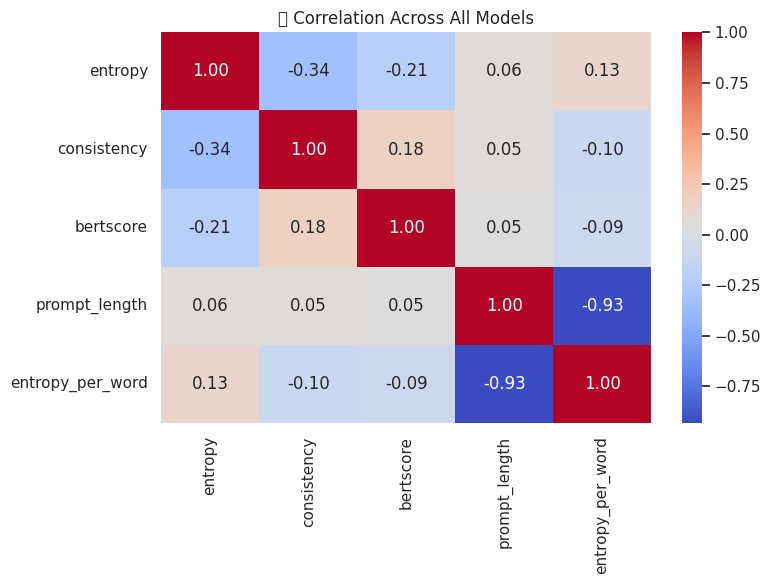

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from collections import defaultdict

# 🧩 Step 1: Load all uploaded CSVs
file_labels = {
    "metrics_summary_gpt.csv": "GPT - Prompts",
    "metrics_summary_gpt_cultural_region.csv": "GPT - Cultural Region",
    "metrics_summary_gpt_global.csv": "GPT - Global",
    "metrics_summary_gemma_prompts.csv": "Gemma - Prompts",
    "metrics_summary_gemma_cultural_region.csv": "Gemma - Cultural Region",
    "metrics_summary_gemma_global.csv": "Gemma - Global",
    "metrics_summary_llama_prompts.csv": "LLaMA - Prompts",
    "metrics_summary_llama_cultural_region.csv": "LLaMA - Cultural Region",
    "metrics_summary_llama_global.csv": "LLaMA - Global"
}

dfs = []
for filename, label in file_labels.items():
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        df["source"] = label
        dfs.append(df)
    else:
        print(f"⚠️ Missing: {filename}")

df_all = pd.concat(dfs, ignore_index=True)

# 🧮 Step 2: Add derived features
df_all["prompt_length"] = df_all["prompt"].str.split().apply(len)
df_all["entropy_per_word"] = df_all["entropy"] / df_all["prompt_length"]

# 📊 Step 3: Correlation matrix
corr = df_all[["entropy", "consistency", "bertscore", "prompt_length", "entropy_per_word"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Correlation Across All Models")
plt.tight_layout()
plt.show()


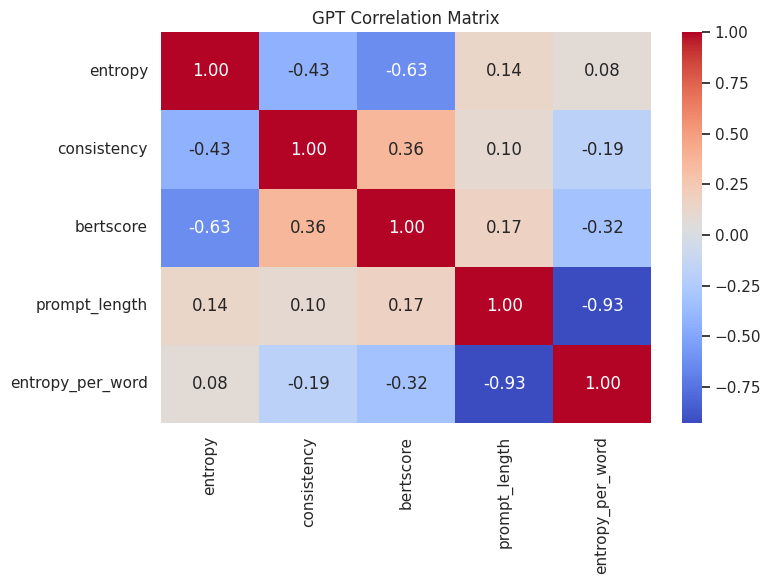

✅ Saved heatmap for GPT: GPT_correlation_heatmap.png


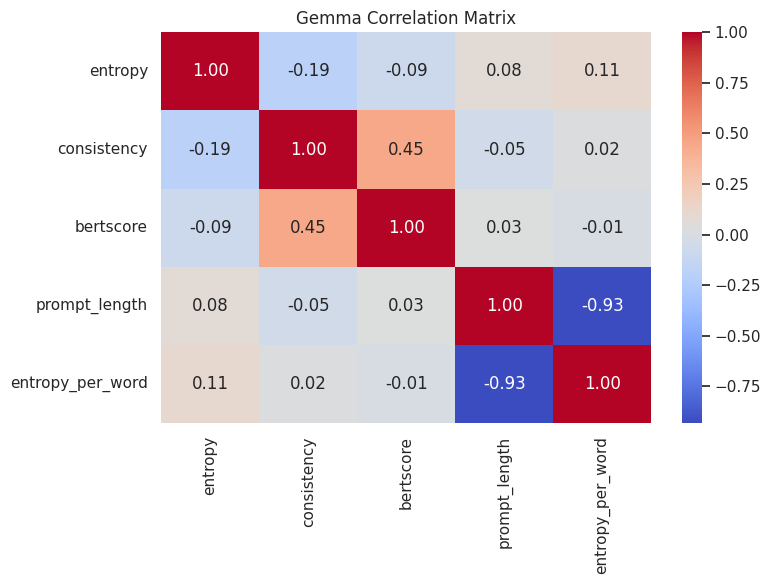

✅ Saved heatmap for Gemma: Gemma_correlation_heatmap.png


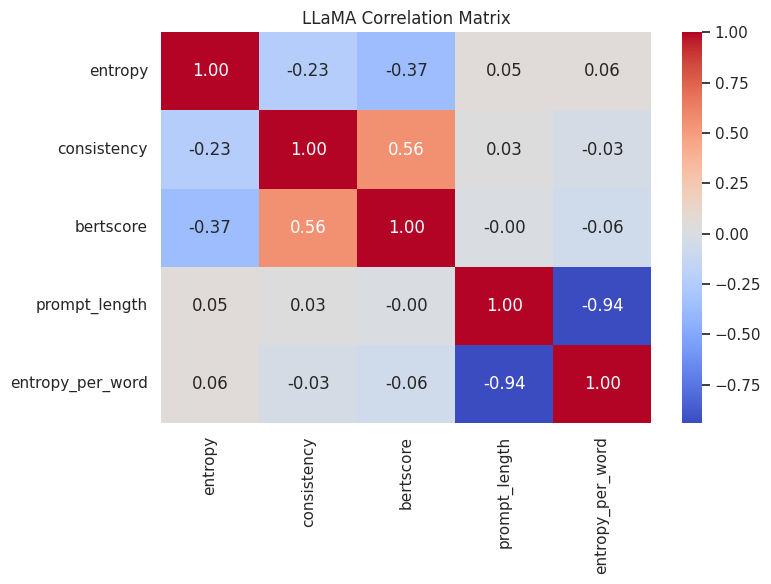

✅ Saved heatmap for LLaMA: LLaMA_correlation_heatmap.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Grouped files by model
model_files = {
    "GPT": [
        "metrics_summary_gpt.csv",
        "metrics_summary_gpt_cultural_region.csv",
        "metrics_summary_gpt_global.csv"
    ],
    "Gemma": [
        "metrics_summary_gemma_prompts.csv",
        "metrics_summary_gemma_cultural_region.csv",
        "metrics_summary_gemma_global.csv"
    ],
    "LLaMA": [
        "metrics_summary_llama_prompts.csv",
        "metrics_summary_llama_cultural_region.csv",
        "metrics_summary_llama_global.csv"
    ]
}

# Create heatmaps for each model
for model, files in model_files.items():
    dfs = []
    for file in files:
        if os.path.exists(file):
            df = pd.read_csv(file)
            dfs.append(df)
        else:
            print(f"⚠️ Missing: {file}")

    df_combined = pd.concat(dfs, ignore_index=True)
    df_combined["prompt_length"] = df_combined["prompt"].str.split().apply(len)
    df_combined["entropy_per_word"] = df_combined["entropy"] / df_combined["prompt_length"]

    # Compute correlation
    corr = df_combined[["entropy", "consistency", "bertscore", "prompt_length", "entropy_per_word"]].corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{model} Correlation Matrix")
    plt.tight_layout()
    image_path = f"{model}_correlation_heatmap.png"
    plt.savefig(image_path)
    plt.show()

    print(f"✅ Saved heatmap for {model}: {image_path}")


In [ ]:
from google.colab import files
files.download("GPT_correlation_heatmap.png")
files.download("Gemma_correlation_heatmap.png")
files.download("LLaMA_correlation_heatmap.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install bert-score sentence-transformers
import json
import pandas as pd
from collections import defaultdict, Counter
from bert_score import score
from sentence_transformers import SentenceTransformer, util
import math

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import numpy as np

from google.colab import files
uploaded = files.upload()
# === Settings ===
input_file = "gpt_outputs_cultural_region.json"  # change as needed
output_csv = "voting_gpt_outputs_cultural_region.csv"

# === Load model ===
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# === Step 1: Load responses ===
with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# === Step 2: Group responses by prompt ===
grouped = defaultdict(list)
for item in data:
    grouped[item["prompt"]].append(item["response"])

# === Step 3: Voting & Evaluation ===
def compute_entropy(responses):
    tokens = [token for resp in responses for token in resp.split()]
    probs = [count / len(tokens) for count in Counter(tokens).values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def compute_consistency(responses):
    if len(responses) < 2:
        return 1.0
    embeddings = embedder.encode(responses, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
    upper = cosine_scores.cpu().numpy()[np.triu_indices(len(responses), k=1)]
    return upper.mean()

def compute_bertscore(responses, reference):
    refs = [reference] * len(responses)
    _, _, f1 = score(responses, refs, lang="en", rescale_with_baseline=True)
    return f1.mean().item()

def vote_response(responses):
    return Counter(responses).most_common(1)[0][0]

records = []

for prompt, responses in grouped.items():
    if len(responses) < 2:
        continue

    voted = vote_response(responses)
    entropy = compute_entropy([voted])
    consistency = compute_consistency(responses)
    bert = compute_bertscore([voted], responses[0])  # use 1st as pseudo-reference

    records.append({
        "prompt": prompt,
        "n_responses": len(responses),
        "voted_response": voted,
        "entropy": round(entropy, 3),
        "consistency": round(consistency, 3),
        "bertscore": round(bert, 3)
    })

# === Step 4: Save to CSV
df = pd.DataFrame(records)
df.to_csv(output_csv, index=False)
print(f"✅ Saved voting analysis to: {output_csv}")


Saving gpt_outputs_cultural_region.json to gpt_outputs_cultural_region (1).json


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

✅ Saved voting analysis to: voting_gpt_outputs_cultural_region.csv


In [ ]:
import numpy as np

from google.colab import files
uploaded = files.upload()
# === Settings ===
input_file = "gpt_outputs_global.json"  # change as needed
output_csv = "voting_gpt_outputs_global.csv"

# === Load model ===
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# === Step 1: Load responses ===
with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# === Step 2: Group responses by prompt ===
grouped = defaultdict(list)
for item in data:
    grouped[item["prompt"]].append(item["response"])

# === Step 3: Voting & Evaluation ===
def compute_entropy(responses):
    tokens = [token for resp in responses for token in resp.split()]
    probs = [count / len(tokens) for count in Counter(tokens).values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def compute_consistency(responses):
    if len(responses) < 2:
        return 1.0
    embeddings = embedder.encode(responses, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
    upper = cosine_scores.cpu().numpy()[np.triu_indices(len(responses), k=1)]
    return upper.mean()

def compute_bertscore(responses, reference):
    refs = [reference] * len(responses)
    _, _, f1 = score(responses, refs, lang="en", rescale_with_baseline=True)
    return f1.mean().item()

def vote_response(responses):
    return Counter(responses).most_common(1)[0][0]

records = []

for prompt, responses in grouped.items():
    if len(responses) < 2:
        continue

    voted = vote_response(responses)
    entropy = compute_entropy([voted])
    consistency = compute_consistency(responses)
    bert = compute_bertscore([voted], responses[0])  # use 1st as pseudo-reference

    records.append({
        "prompt": prompt,
        "n_responses": len(responses),
        "voted_response": voted,
        "entropy": round(entropy, 3),
        "consistency": round(consistency, 3),
        "bertscore": round(bert, 3)
    })

# === Step 4: Save to CSV
df = pd.DataFrame(records)
df.to_csv(output_csv, index=False)
print(f"✅ Saved voting analysis to: {output_csv}")


Saving gpt_outputs_global.json to gpt_outputs_global.json


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

✅ Saved voting analysis to: voting_gpt_outputs_global.csv


In [ ]:
!pip install sentence-transformers

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load model
embedder = SentenceTransformer("all-MiniLM-L6-v2")

def compute_consistency_voted_vs_original(df, text_column="response"):
    grouped = df.groupby("prompt")[text_column].apply(list).reset_index()
    consistency_scores = []

    for _, row in grouped.iterrows():
        responses = row[text_column]
        if len(responses) < 2:
            continue

        voted_response = responses[0]  # Assumed first
        original_responses = responses[1:]

        all_responses = [voted_response] + original_responses
        embeddings = embedder.encode(all_responses, convert_to_tensor=True)
        voted_embed = embeddings[0]
        original_embeds = embeddings[1:]

        similarities = util.cos_sim(voted_embed, original_embeds).squeeze().tolist()
        avg_similarity = sum(similarities) / len(similarities)
        consistency_scores.append(avg_similarity)

    return sum(consistency_scores) / len(consistency_scores) if consistency_scores else 0.0

# Load your voting file
df = pd.read_csv("/content/voting_gpt_outputs.csv")  # Update path as needed
new_consistency = compute_consistency_voted_vs_original(df)
print(f"🧠 New Consistency Score (Voting vs Originals): {new_consistency:.4f}")


In [ ]:
!pip install sentence-transformers

import pandas as pd
import json
from sentence_transformers import SentenceTransformer, util

# Load data
with open("/content/gpt_outputs.json", "r", encoding="utf-8") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_gpt_outputs.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")


🧠 Voted-to-Original Consistency Score: 0.9262


In [ ]:
!pip install sentence-transformers

import pandas as pd
import json
from sentence_transformers import SentenceTransformer, util

# Load data
with open("/content/gpt_outputs_cultural_region.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_gpt_outputs_cultural_region.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")


🧠 Voted-to-Original Consistency Score: 0.9487


In [ ]:
!pip install sentence-transformers

import pandas as pd
import json
from sentence_transformers import SentenceTransformer, util

# Load data
with open("/content/gpt_outputs_global.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_gpt_outputs_global.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")


🧠 Voted-to-Original Consistency Score: 0.9529


In [ ]:
!pip install sentence-transformers

import pandas as pd
import json
from sentence_transformers import SentenceTransformer, util

# Load data
with open("/content/llama_outputs_prompts.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_llama_outputs_prompts.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")


In [ ]:
# Load data
with open("/content/llama_outputs_cultural_region.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_llama_outputs_cultural_region.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")

🧠 Voted-to-Original Consistency Score: 0.9259


In [ ]:
# Load data
with open("/content/llama_outputs_global.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_llama_outputs_global.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")

🧠 Voted-to-Original Consistency Score: 0.9417


In [ ]:
# Load data
with open("/content/gemma_outputs_prompts.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_evaluation_gemma_prompts.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")

🧠 Voted-to-Original Consistency Score: 0.9406


In [ ]:
# Load data
with open("/content/gemma_outputs_cultural_region.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_gemma_outputs_cultural_region.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")

🧠 Voted-to-Original Consistency Score: 0.9262


In [ ]:
# Load data
with open("/content/gemma_outputs_global.json") as f:
    original_data = json.load(f)

df_voting = pd.read_csv("/content/voting_gemma_outputs_global.csv")  # your voting file

# Group original responses by prompt
from collections import defaultdict

grouped = defaultdict(list)
for item in original_data:
    grouped[item["prompt"]].append(item["response"])

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

similarities = []

for _, row in df_voting.iterrows():
    prompt = row["prompt"]
    voted_response = row["voted_response"]

    if prompt not in grouped:
        continue

    originals = grouped[prompt]

    # Embed all responses
    embeds = model.encode([voted_response] + originals, convert_to_tensor=True)
    voted_embed = embeds[0]
    orig_embeds = embeds[1:]

    # Cosine similarity between voted and each original
    sim_scores = util.cos_sim(voted_embed, orig_embeds).squeeze().tolist()
    if isinstance(sim_scores, float):  # in case there's only one original response
        sim_scores = [sim_scores]

    similarities.extend(sim_scores)

# Final consistency = average similarity between voted and originals
final_consistency = sum(similarities) / len(similarities)
print(f"🧠 Voted-to-Original Consistency Score: {final_consistency:.4f}")

🧠 Voted-to-Original Consistency Score: 0.9388


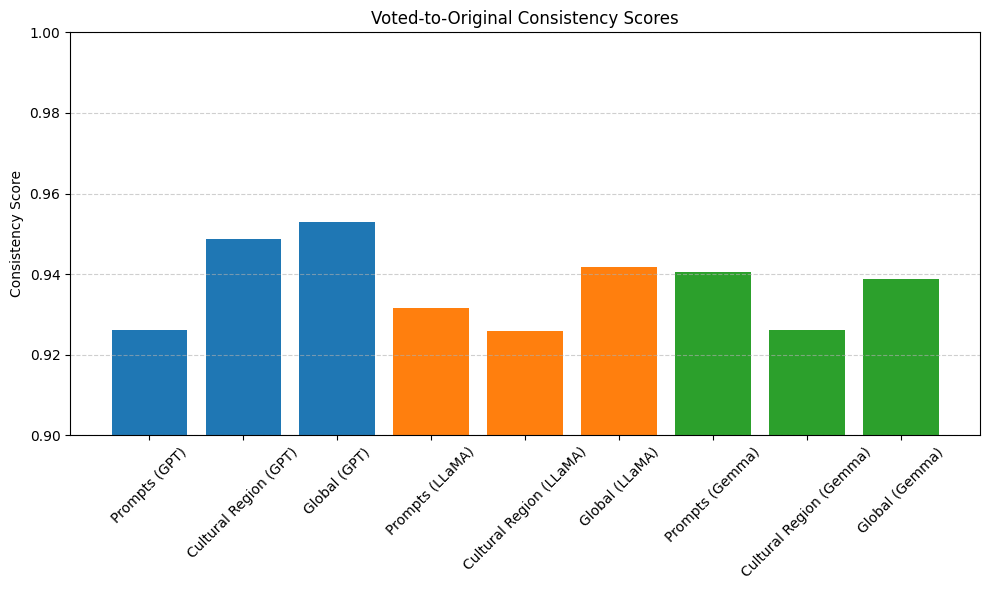

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "Model": ["GPT"] * 3 + ["LLaMA"] * 3 + ["Gemma"] * 3,
    "Prompt Type": ["Prompts", "Cultural Region", "Global"] * 3,
    "Consistency Score": [
        0.9262, 0.9487, 0.9529,
        0.9316, 0.9259, 0.9417,
        0.9406, 0.9262, 0.9388
    ]
}

df = pd.DataFrame(data)

# Create bar plot
plt.figure(figsize=(10, 6))
for model in df["Model"].unique():
    subset = df[df["Model"] == model]
    plt.bar(subset["Prompt Type"] + f" ({model})", subset["Consistency Score"], label=model)

plt.axhline(1.0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Voted-to-Original Consistency Scores")
plt.ylabel("Consistency Score")
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


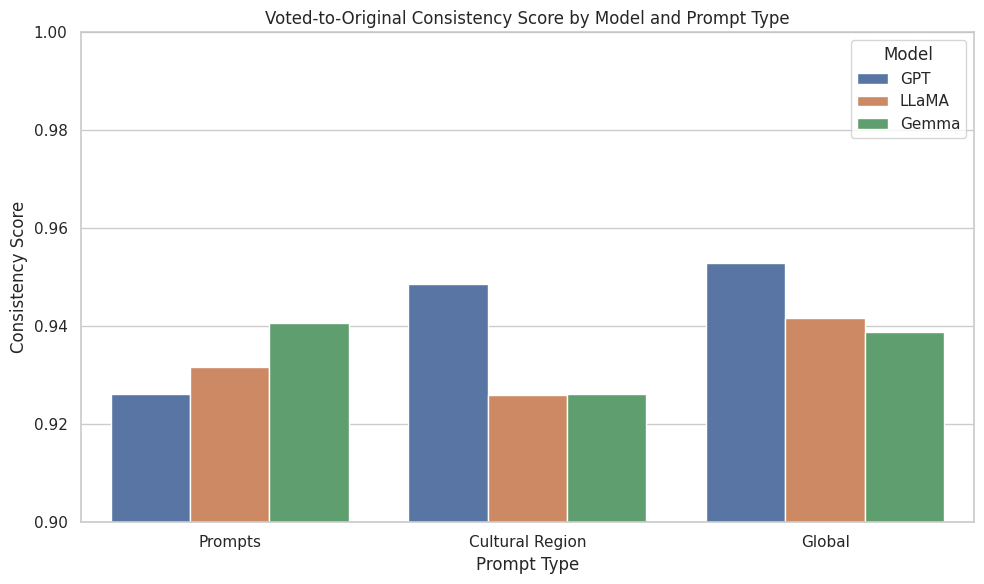

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
data = {
    "Model": ["GPT"] * 3 + ["LLaMA"] * 3 + ["Gemma"] * 3,
    "Prompt Type": ["Prompts", "Cultural Region", "Global"] * 3,
    "Consistency Score": [
        0.9262, 0.9487, 0.9529,
        0.9316, 0.9259, 0.9417,
        0.9406, 0.9262, 0.9388
    ]
}

df = pd.DataFrame(data)

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create grouped bar chart
sns.barplot(data=df, x="Prompt Type", y="Consistency Score", hue="Model")

# Formatting
plt.title("Voted-to-Original Consistency Score by Model and Prompt Type")
plt.ylim(0.9, 1.0)
plt.axhline(1.0, color="gray", linestyle="--", linewidth=0.5)
plt.ylabel("Consistency Score")
plt.xlabel("Prompt Type")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


# **New Set African countries only**


In [ ]:
import pandas as pd

data = [
    ("Africa", "Philosophy", "What are the values emphasized in Ubuntu philosophy?"),
    ("Africa", "Leadership", "How should a leader act in a traditional African village?"),
    ("Africa", "Family Structure", "What is the role of elders in African family decision-making?"),
    ("Africa", "Community Values", "How important is community over individualism in African societies?"),
    ("Africa", "Politics", "How do African nations view the role of the West in development?"),
    ("Africa", "Music & Culture", "What is the cultural significance of traditional African music?"),
    ("Africa", "Government Policy", "How should a government support rural African communities?"),
    ("Africa", "Marriage Customs", "What are views on polygamy in modern African cultures?"),
    ("Africa", "Education", "How is education viewed across different African cultures?"),
    ("Africa", "Conflict Resolution", "What are traditional conflict resolution methods in African tribes?"),
    ("Africa", "Gender Roles", "How do gender roles vary across African cultures?"),
    ("Africa", "Religion", "What role does religion play in shaping social behavior in African societies?"),
    ("Africa", "Health Beliefs", "How are traditional healing practices perceived in African communities?"),
    ("Africa", "Environment", "What is the cultural relationship between African communities and the land?"),
    ("Africa", "Storytelling", "What is the role of oral storytelling in preserving African history?"),
    ("Africa", "Youth Culture", "How are youth shaping modern African cultural identities?"),
    ("Africa", "Technology", "What are the cultural attitudes toward digital technology in African rural areas?"),
    ("Africa", "Colonial Legacy", "How is colonialism remembered and discussed in African societies today?"),
    ("Africa", "Justice", "What does justice mean in the context of traditional African law?"),
    ("Africa", "Hospitality", "How is hospitality culturally expressed in African traditions?"),
    ("Africa", "Work Ethic", "How is hard work valued in traditional African communities?"),
    ("Africa", "Art", "What role does traditional African art play in cultural identity?"),
    ("Africa", "Language", "How do African proverbs reflect collective cultural wisdom?"),
    ("Africa", "Diaspora", "How do African countries view the return or influence of the African diaspora?"),
    ("Africa", "Sustainability", "What are traditional African practices that promote sustainability?"),
    ("Africa", "Eldercare", "How are aging and elder care handled in African cultural settings?"),
    ("Africa", "Corruption", "How is political corruption perceived in African societies?"),
    ("Africa", "Festivals", "What is the cultural importance of festivals in African regions?"),
    ("Africa", "Death & Mourning", "What are the cultural customs around death and mourning in Africa?"),
    ("Africa", "Peacebuilding", "How do traditional African communities resolve intergroup conflict?")
]

# Save to CSV
df = pd.DataFrame(data, columns=["region", "topic", "prompt"])
df.to_csv("african_prompts.csv", index=False)


# **Consistency Classifier**

In [ ]:
!pip install sentence-transformers scikit-learn


  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Sample dataset (you’ll replace this with real responses + consistency labels)
responses = [
    "Freedom of speech must be preserved at all costs.",
    "In some cultures, freedom is shared not individual.",
    "Religion often guides ethical decisions.",
    "The AI cannot be neutral in value-laden contexts.",
    "Protests aren't always a viable solution.",
    "Gender equality isn't universal.",
    "Students must always obey authority.",
    "Rebellion is valid when rights are suppressed.",
    "Ethics is communal, not personal.",
    "Free speech is a universal right.",
] * 3

# 0 = Inconsistent, 1 = Partially Consistent, 2 = Consistent
labels = [2, 1, 2, 0, 1, 1, 0, 2, 1, 2] * 3

# Load pre-trained embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")
X = model.encode(responses)
y = np.array(labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train MLP Classifier
clf = MLPClassifier(hidden_layer_sizes=(64,), max_iter=500, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Inconsistent", "Partially Consistent", "Consistent"]))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                      precision    recall  f1-score   support

        Inconsistent       1.00      1.00      1.00         1
Partially Consistent       1.00      1.00      1.00         4
          Consistent       1.00      1.00      1.00         4

            accuracy                           1.00         9
           macro avg       1.00      1.00      1.00         9
        weighted avg       1.00      1.00      1.00         9



In [ ]:
!pip install --upgrade transformers datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:


from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score

# 1. Sample dataset (replace with real data later)
responses = [
    "Freedom of speech is vital to democracy.",
    "Protests are often culturally discouraged.",
    "AI should not reflect religious bias.",
    "Students should not question teachers.",
    "Cultural norms often override personal freedom.",
    "Gender equality is essential in all societies.",
    "Religious traditions guide moral reasoning.",
    "Collective values surpass individual rights.",
    "Freedom must come with responsibility.",
    "Conformity is essential in some cultures.",
] * 3  # 30 samples

labels = [2, 1, 2, 0, 1, 2, 2, 1, 2, 0] * 3

# 2. Load tokenizer and encode data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

dataset = Dataset.from_dict({"text": responses, "label": labels})
dataset = dataset.train_test_split(test_size=0.3, seed=42)
tokenized_dataset = dataset.map(tokenize)

# 3. Load model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# 4. Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted")
    }

# 5. Trainer setup
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    eval_strategy="no",  # or remove if not supported
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# 6. Train the model
trainer.train()

# 7. Evaluate
preds_output = trainer.predict(tokenized_dataset["test"])
print(classification_report(tokenized_dataset["test"]["label"], np.argmax(preds_output.predictions, axis=1), target_names=["Inconsistent", "Partially Consistent", "Consistent"]))


Map:   0%|          | 0/21 [00:00<?, ? examples/s]

Map:   0%|          | 0/9 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

# **ANOVA for African prompts**

In [ ]:
import pandas as pd
from scipy.stats import f_oneway


In [ ]:
# Load entropy data
gpt_df = pd.read_csv("/content/metrics_summary_gpt.csv")
gemma_df = pd.read_csv("/content/metrics_summary_llama_prompts.csv")
llama_df = pd.read_csv("/content/metrics_summary_gemma_prompts.csv")

# Extract entropy values
gpt_entropy = gpt_df["entropy"].dropna()
gemma_entropy = gemma_df["entropy"].dropna()
llama_entropy = llama_df["entropy"].dropna()


In [ ]:
# Perform one-way ANOVA
f_stat, p_val = f_oneway(gpt_entropy, gemma_entropy, llama_entropy)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("✅ Statistically significant differences in entropy across models (p < 0.05).")
else:
    print("❌ No statistically significant difference found.")


F-statistic: 2.6005048578208716
p-value: 0.07594313361487567
❌ No statistically significant difference found.


<ipython-input-12-066803f30d4f>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


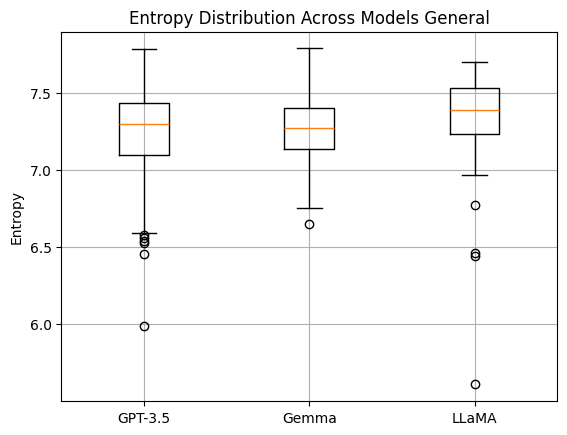

In [ ]:
import matplotlib.pyplot as plt

data = [gpt_entropy, gemma_entropy, llama_entropy]
labels = ["GPT-3.5", "Gemma", "LLaMA"]

plt.boxplot(data, labels=labels)
plt.title("Entropy Distribution Across Models General")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()
